# Data Exploration

The data exploration is about fines in the city of Cologne. The two datasets which are going to be analyzed are from the year 2016 and january 2018, however the analysis focuses on the months january only. 

For further analysis of the data the "Bundeseinheitlicher Tatbestandskatalog - Straßenverkehrsordnungswidrigkeiten" (Stand: 09.11.2021 – 14. Auflage) was used to encode the fines.
The document can be downloaded on this webpage: https://www.kba.de/DE/Themen/ZentraleRegister/FAER/BT_KAT_OWI/bkat_owi_09_11_2021_richText.html;jsessionid=CBC10B041794A12560B503AC6E2FFB49.live11311 

## Install dependencies

In [6]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load fine data

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df16 = pd.read_sql_table('fine16', 'sqlite:///../data/fine_data.sqlite')
df18 = pd.read_sql_table('fine18', 'sqlite:///../data/fine_data.sqlite')

### Look at the first rows

In [8]:
df16.head(10)

,jahr,monat,datum_von,kennzeichen1,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
0,2016,1,2016-01-21 11:15:00.000,K,PKW,OPEL,FRANKFURTER STR.,70,141322,None,None
1,2016,1,2016-01-21 11:52:00.000,LEV,PKW,OPEL,GRAF-ADOLF-STR.,64,113140,None,None
2,2016,1,2016-01-21 10:28:00.000,K,PKW,JAGUAR,JAN-WELLEM-STR.,None,113140,None,None
3,2016,1,2016-01-21 10:20:00.000,K,PKW,FORD,JAN-WELLEM-STR.,None,113140,None,None
4,2016,1,2016-01-21 09:14:00.000,K,PKW,FORD,JAN-WELLEM-STR.,None,113140,None,None
5,2016,1,2016-01-21 08:33:00.000,K,PKW,VW-VOLKSWAGEN,GRONAUER STR.,43-45,112403,None,None
6,2016,1,2016-01-26 08:00:00.000,K,PKW,RENAULT,JOSEPHSKIRCHSTR.,58,142103,None,None
7,2016,1,2016-01-26 07:24:00.000,K,PKW,FIAT,WIPPERFÜRTHER STR.,None,112402,None,None
8,2016,1,2016-01-25 16:23:00.000,K,PKW,MERCEDES,SIEVERSSTR.,36,141312,None,None
9,2016,1,2016-01-25 16:34:00.000,K,PKW,VOLVO,DILLENBURGER STR.,None,141621,None,None


In [9]:
df18.head(10)

,datum_von,kennzeichen1,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
0,2018-01-06 10:44:00.000,WÜ,PKW,AUDI,GUSTAVSTR.,56,141322,None,None
1,2018-01-06 10:44:00.000,BN,PKW,MAZDA,GUSTAVSTR.,56,141322,None,None
2,2018-01-06 10:38:00.000,NE,PKW,BMW,ZÜLPICHER STR.,311,141322,None,None
3,2018-01-06 10:40:00.000,K,PKW,HONDA,ZÜLPICHER STR.,None,141245,None,None
4,2018-01-29 10:48:00.000,K,PKW,RENAULT,BRÜSSELER STR.,None,113141,None,None
5,2018-01-29 10:48:00.000,BN,PKW,MERCEDES,BRÜSSELER STR.,None,113141,None,None
6,2018-01-29 10:45:00.000,HH,PKW,VW-VOLKSWAGEN,AACHENER STR.,33,141322,None,None
7,2018-01-29 10:32:00.000,K,PKW,AUDI,AACHENER STR.,None,141322,None,None
8,2018-01-29 10:45:00.000,K,PKW,BMW,AACHENER STR.,29,141322,None,None
9,2018-01-05 08:30:00.000,K,PKW,PEUGEOT,SÜLZBURGSTR.,172,141322,None,None


### Data exploration
Some basic information about the data.

#### Dataset 1: Fine Data of Cologne in 2016 

In [10]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921353 entries, 0 to 921352
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   jahr          921353 non-null  int64 
 1   monat         921353 non-null  int64 
 2   datum_von     921353 non-null  object
 3   kennzeichen1  921338 non-null  object
 4   fahrzeugart   921353 non-null  object
 5   fabrikat      920202 non-null  object
 6   strasse       921353 non-null  object
 7   hausnummer    618864 non-null  object
 8   tatbestand1   921353 non-null  object
 9   tatbestand2   47189 non-null   object
 10  tatbestand3   3605 non-null    object
dtypes: int64(2), object(9)
memory usage: 77.3+ MB


Get rid of unessecary data and rows with missing data.

In [11]:
for number in range(2, 13): 
    df16 = df16[df16.monat != number]

df16 = df16.drop(["jahr", "monat", "datum_von", "tatbestand2", "tatbestand3","hausnummer", "kennzeichen1"], axis=1)
df16 = df16.dropna()
df16.describe()

,fahrzeugart,fabrikat,strasse,tatbestand1
count,80660,80660,80660,80660
unique,13,88,2328,243
top,PKW,VW-VOLKSWAGEN,NEUSSER STR.,113140
freq,78923,13712,2446,31548


In [12]:
df16["tatbestand1"].value_counts()

tatbestand1
113140      31548
141312      10473
141322       6678
112402       3709
142103       2229
            ...  
970121          1
142233          1
141116.B        1
141333          1
112100.A        1
Name: count, Length: 243, dtype: int64

<Axes: xlabel='fabrikat', ylabel='count'>

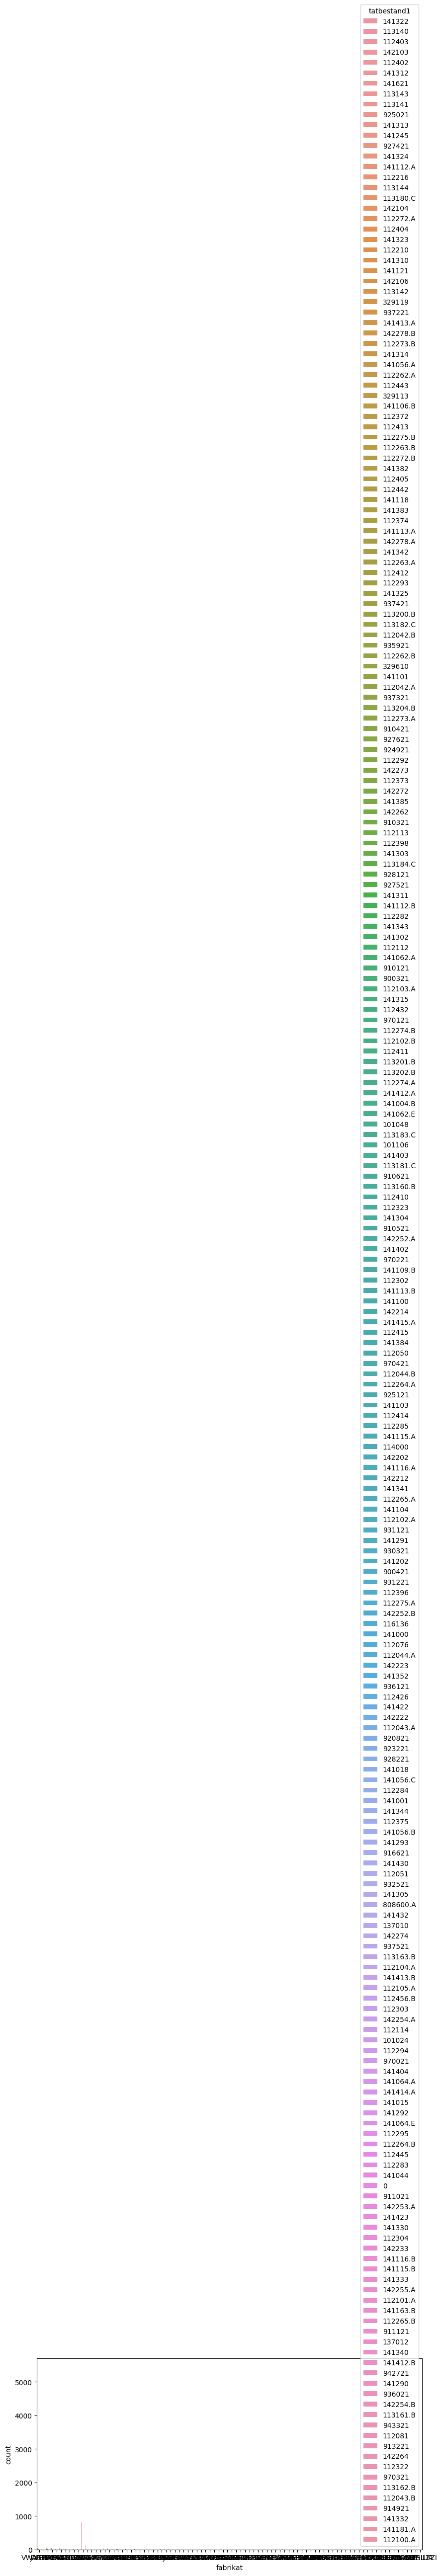

In [13]:
f,ax = plt.subplots(figsize=(10,5))
sns.countplot(x = 'fabrikat', hue='tatbestand1', data = df16)

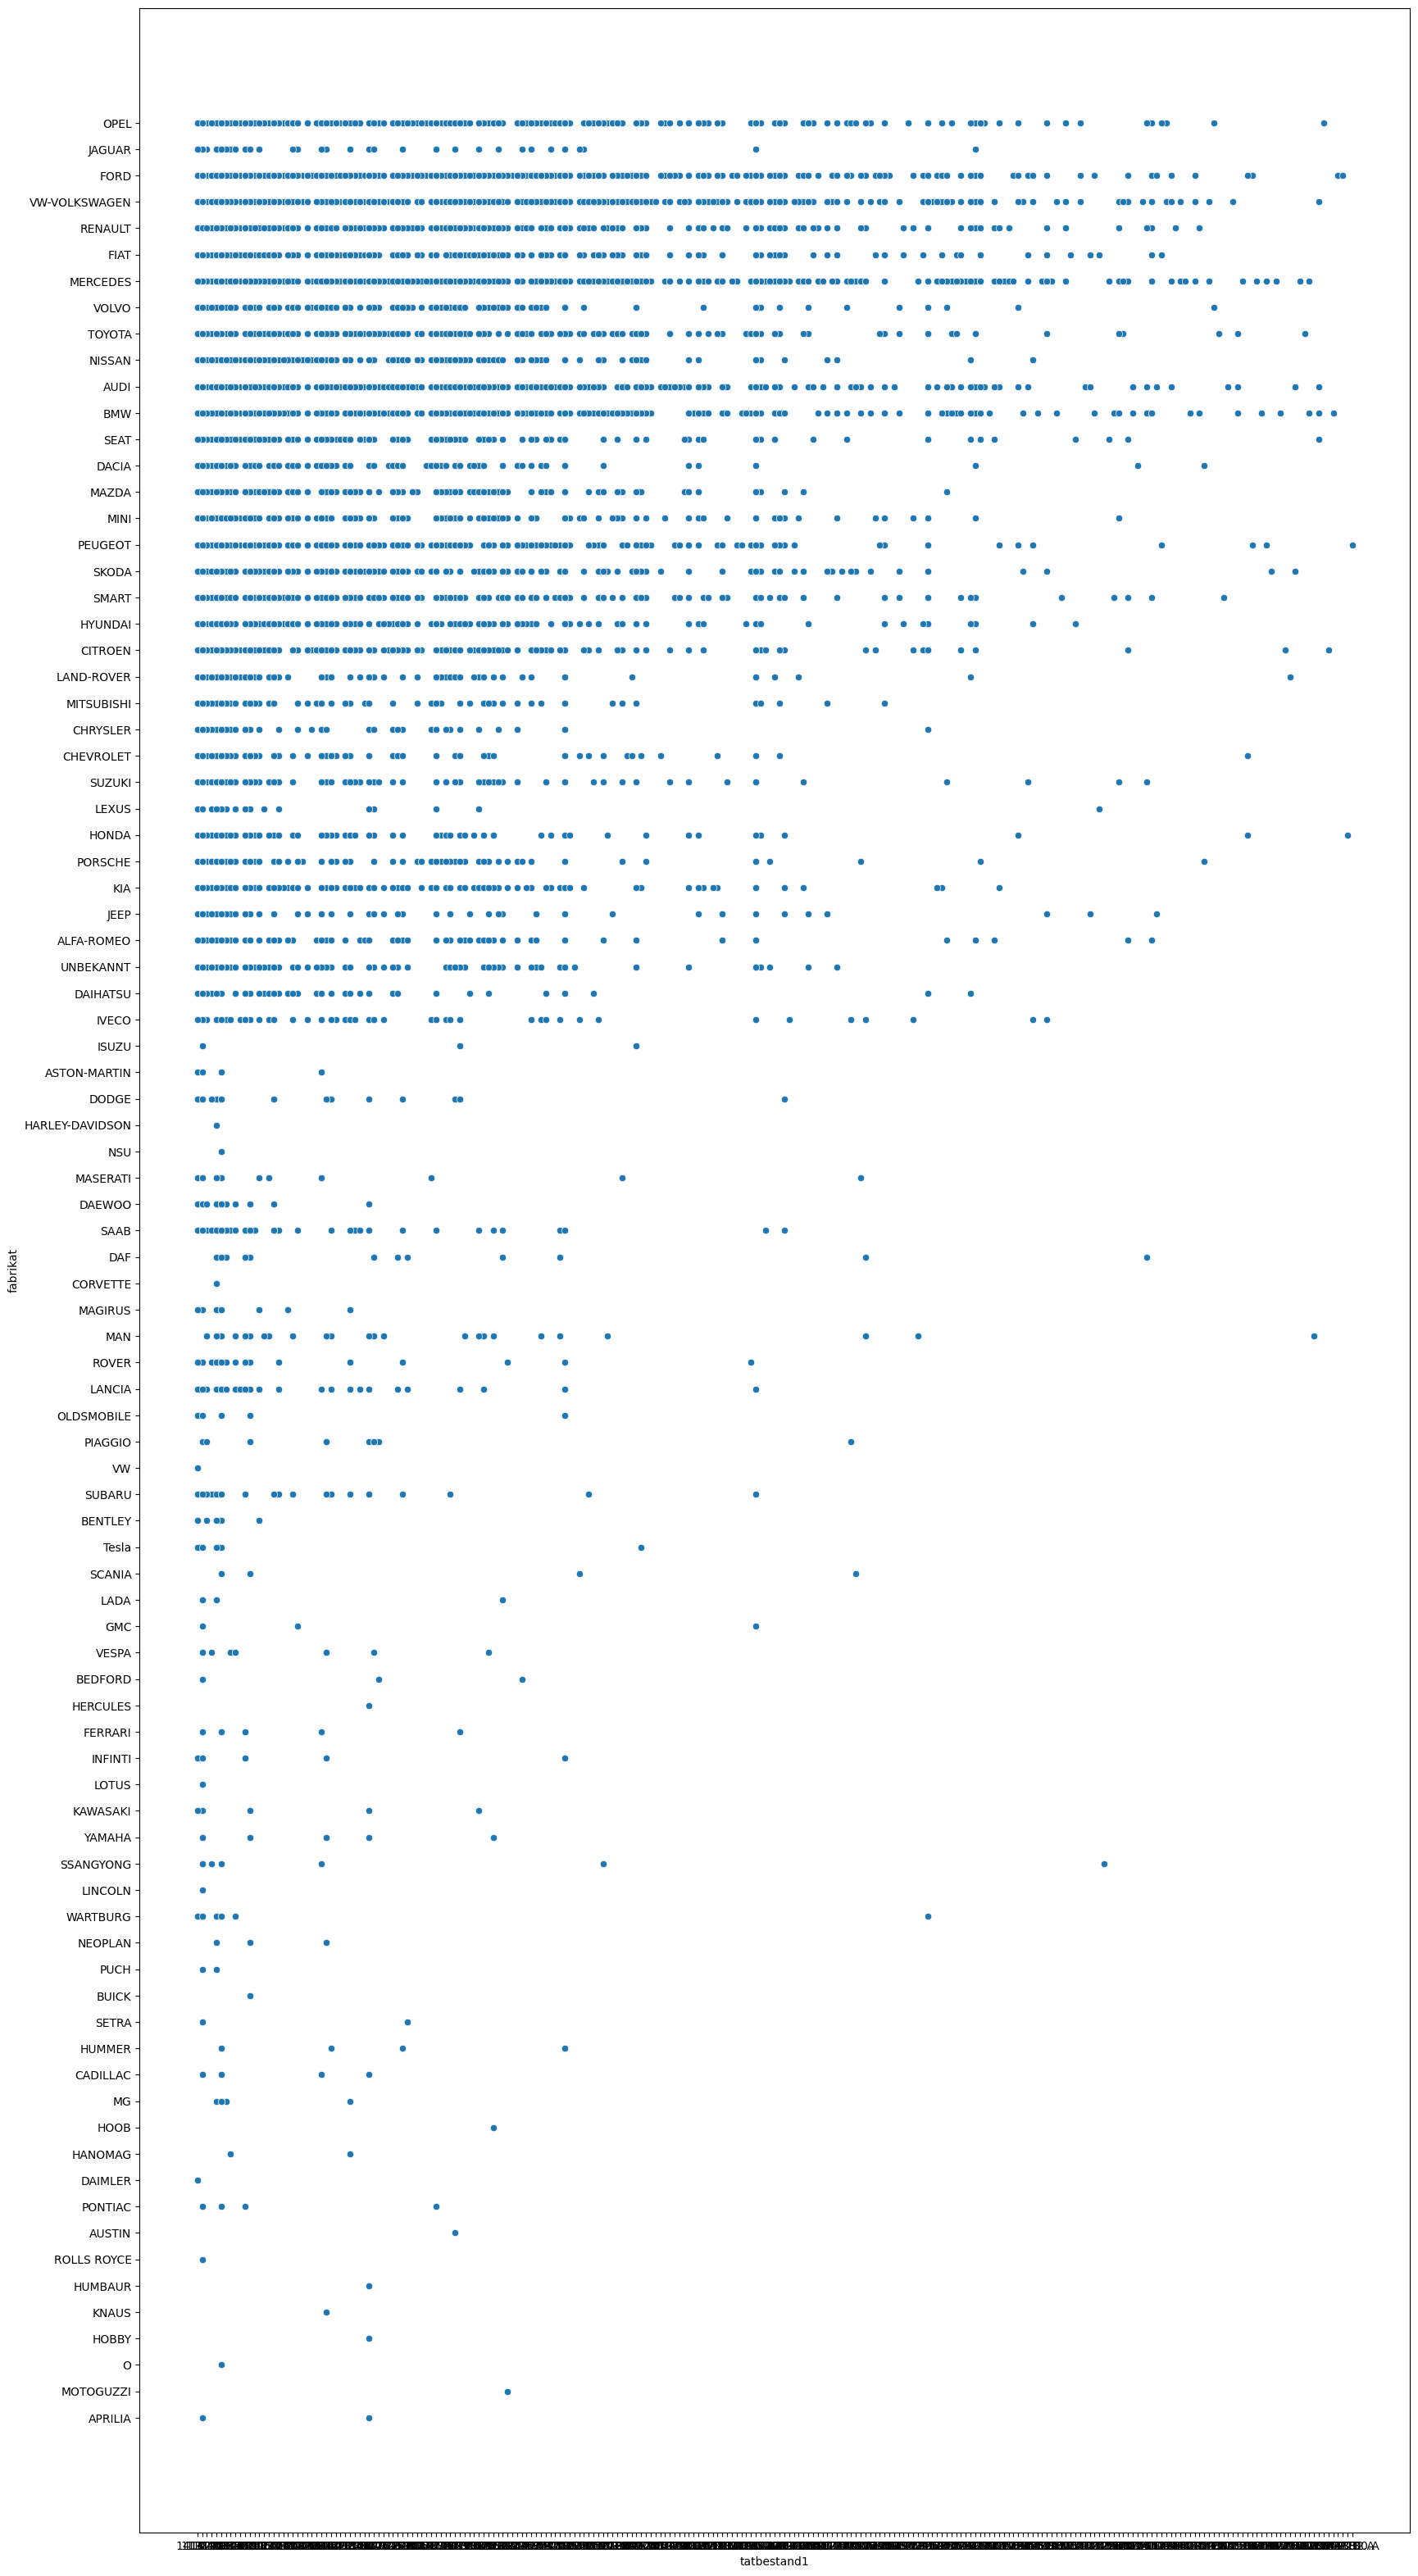

In [14]:
f,ax = plt.subplots(figsize=(20,40))
sns.scatterplot(x ='tatbestand1', y = 'fabrikat', data = df16, sizes=(1,100))
plt.show()

No siginificant patterns noticed

***Decision: Only look at the top 20 fines of 2016 & use sqlite3***

Most common fines:

In [19]:
import sqlite3

con = sqlite3.connect("../data/fine_data.sqlite")
curs = con.cursor()

curs.execute("SELECT COUNT(tatbestand1) as anzahl, tatbestand1 FROM fine16 GROUP BY tatbestand1 ORDER BY anzahl desc LIMIT 20").fetchall()

[(364550, '113140'),
 (115455, '141312'),
 (73111, '141322'),
 (39312, '112402'),
 (25226, '142103'),
 (18105, '112403'),
 (17027, '141313'),
 (16769, '113141'),
 (14711, '113142'),
 (14632, '141245'),
 (14300, '113144'),
 (12499, '141621'),
 (12373, '937221'),
 (11767, '142278.A'),
 (11653, '329113'),
 (9920, '113143'),
 (8393, '141323'),
 (7553, '141314'),
 (7320, '910321'),
 (6231, '141324')]

<Axes: xlabel='tatbestand1', ylabel='count'>

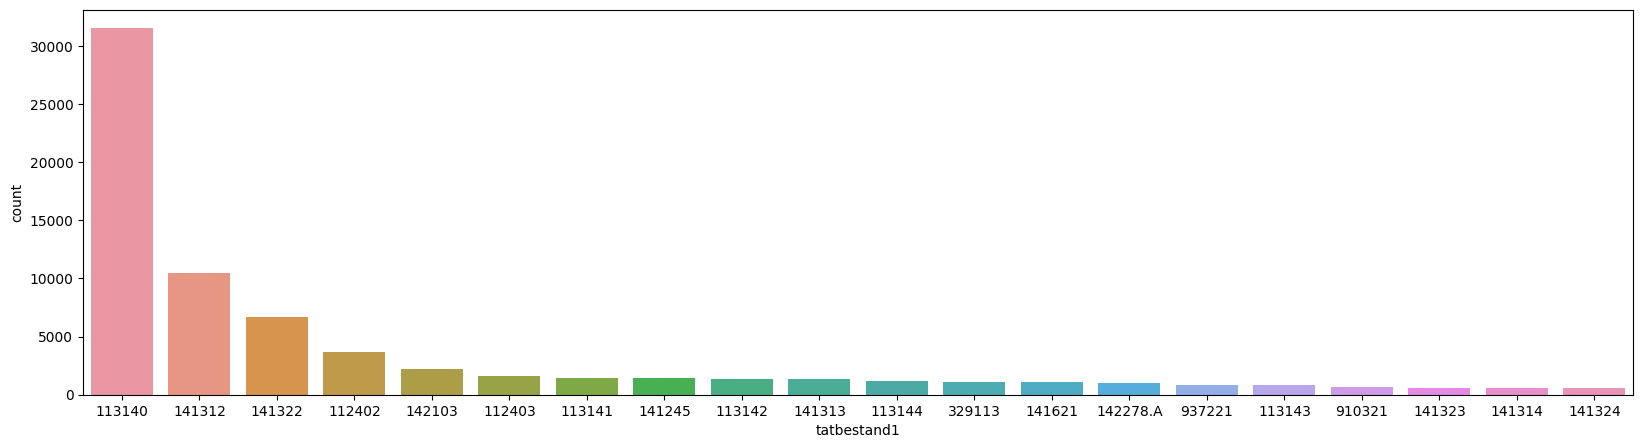

In [20]:
df1 = df16.query("tatbestand1 == '113140' | tatbestand1 == '141312' | tatbestand1 == '141322' | tatbestand1 == '112402' | tatbestand1 == '142103' | tatbestand1 == '112403' | tatbestand1 == '141313' | tatbestand1 == '113141' | tatbestand1 == '113142' | tatbestand1 == '141245' | tatbestand1 == '113144' | tatbestand1 == '141621' | tatbestand1 == '937221' | tatbestand1 == '142278.A' | tatbestand1 == '329113' | tatbestand1 == '113143' | tatbestand1 == '141323' | tatbestand1 == '141314' | tatbestand1 == '910321' | tatbestand1 == '141324' ")

f,ax = plt.subplots(figsize=(20,5))
sns.countplot(x = 'tatbestand1', data = df1, order=df1['tatbestand1'].value_counts().index)

Brands ('fabrikat') which got the most fines:

In [21]:
curs.execute("SELECT COUNT(fabrikat) as anzahl, fabrikat FROM fine16 GROUP BY fabrikat ORDER BY anzahl desc LIMIT 20").fetchall()

[(156883, 'VW-VOLKSWAGEN'),
 (120337, 'FORD'),
 (100905, 'MERCEDES'),
 (78196, 'BMW'),
 (67461, 'AUDI'),
 (59086, 'OPEL'),
 (40792, 'RENAULT'),
 (31309, 'FIAT'),
 (24821, 'SMART'),
 (24588, 'TOYOTA'),
 (23709, 'PEUGEOT'),
 (21262, 'CITROEN'),
 (18274, 'SKODA'),
 (17092, 'MINI'),
 (15360, 'SEAT'),
 (14892, 'NISSAN'),
 (13496, 'HYUNDAI'),
 (11835, 'VOLVO'),
 (9706, 'MAZDA'),
 (8652, 'KIA')]

<Axes: xlabel='fabrikat', ylabel='count'>

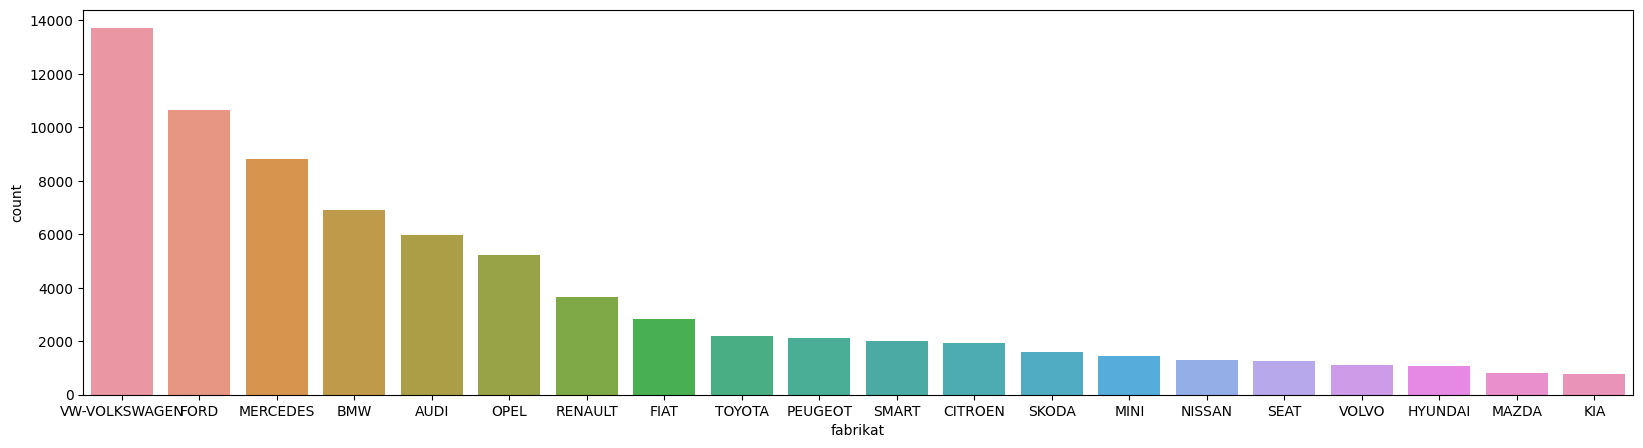

In [22]:
df2 = df16.query("fabrikat == 'VW-VOLKSWAGEN' | fabrikat == 'FORD' |fabrikat == 'MERCEDES' | fabrikat == 'BMW' | fabrikat == 'AUDI' | fabrikat == 'OPEL' | fabrikat == 'RENAULT' | fabrikat == 'FIAT' | fabrikat == 'SMART' | fabrikat == 'TOYOTA' | fabrikat == 'PEUGEOT' | fabrikat == 'CITROEN' | fabrikat == 'SKODA' | fabrikat == 'MINI' | fabrikat == 'SEAT' | fabrikat == 'NISSAN' | fabrikat == 'HYUNDAI' | fabrikat == 'VOLVO' | fabrikat == 'MAZDA' | fabrikat == 'KIA' ")

f,ax = plt.subplots(figsize=(20,5))
sns.countplot(x = 'fabrikat', data = df2, order=df2['fabrikat'].value_counts().index)

#### Dataset 2: Fine Data of Cologne in 2018 


In [23]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73226 entries, 0 to 73225
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datum_von     73226 non-null  object
 1   kennzeichen1  73225 non-null  object
 2   fahrzeugart   73226 non-null  object
 3   fabrikat      73178 non-null  object
 4   strasse       73226 non-null  object
 5   hausnummer    49757 non-null  object
 6   tatbestand1   73226 non-null  object
 7   tatbestand2   4560 non-null   object
 8   tatbestand3   311 non-null    object
dtypes: object(9)
memory usage: 5.0+ MB


Get rid of unessecary data and rows with missing data.

In [ ]:
df18 = df18.drop(["datum_von", "tatbestand2", "tatbestand3","hausnummer", "kennzeichen1"], axis=1)
df18 = df18.dropna()
df18.describe()

,fahrzeugart,fabrikat,strasse,tatbestand1
count,73178,73178,73178,73178
unique,15,86,2416,212
top,PKW,VW-VOLKSWAGEN,NEUSSER STR.,113140
freq,71139,12800,2368,27848


In [ ]:
df18["tatbestand1"].value_counts()

tatbestand1
113140      27848
141312      10333
141322       6071
112402       3769
142103       1737
            ...  
925221          1
142107          1
113164.B        1
932921          1
142254.A        1
Name: count, Length: 212, dtype: int64

***Decision: Only look at the top 20 fines of 2016 & use sqlite3***

Most common fines:

In [ ]:
curs.execute("SELECT COUNT(tatbestand1) as anzahl, tatbestand1 FROM fine18 GROUP BY tatbestand1 ORDER BY anzahl desc LIMIT 20").fetchall()

[(27854, '113140'),
 (10340, '141312'),
 (6071, '141322'),
 (3770, '112402'),
 (1738, '142103'),
 (1435, '141313'),
 (1382, '112403'),
 (1200, '113141'),
 (1161, '113144'),
 (1140, '329113'),
 (1067, '141245'),
 (1037, '113142'),
 (986, '142278.A'),
 (944, '937221'),
 (761, '141323'),
 (757, '113143'),
 (603, '141314'),
 (591, '141621'),
 (539, '910321'),
 (517, '141106.B')]

<Axes: xlabel='tatbestand1', ylabel='count'>

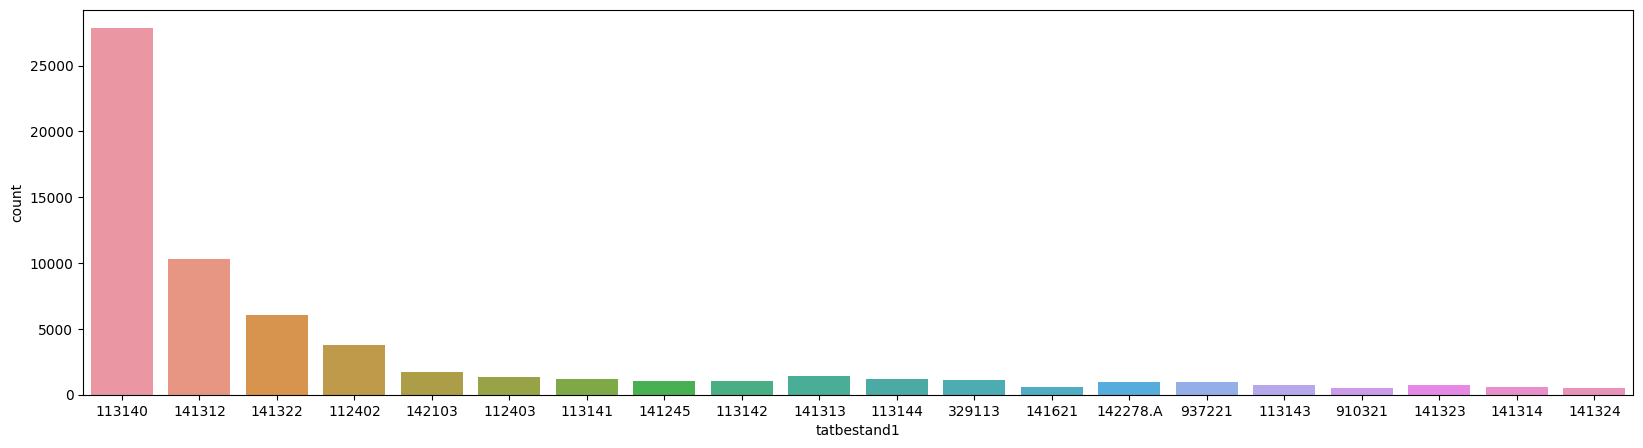

In [ ]:
df4 = df18.query("tatbestand1 == '113140' | tatbestand1 == '141312' | tatbestand1 == '141322' | tatbestand1 == '112402' | tatbestand1 == '142103' | tatbestand1 == '112403' | tatbestand1 == '141313' | tatbestand1 == '113141' | tatbestand1 == '113142' | tatbestand1 == '141245' | tatbestand1 == '113144' | tatbestand1 == '141621' | tatbestand1 == '937221' | tatbestand1 == '142278.A' | tatbestand1 == '329113' | tatbestand1 == '113143' | tatbestand1 == '141323' | tatbestand1 == '141314' | tatbestand1 == '910321' | tatbestand1 == '141324' ")

f,ax = plt.subplots(figsize=(20,5))
sns.countplot(x = 'tatbestand1', data = df4, order=df1['tatbestand1'].value_counts().index)

Brands ('fabrikat') most common to get a fine:

In [ ]:
curs.execute("SELECT COUNT(fabrikat) as anzahl, fabrikat FROM fine18 GROUP BY fabrikat ORDER BY anzahl desc LIMIT 20").fetchall()

[(12800, 'VW-VOLKSWAGEN'),
 (9432, 'FORD'),
 (8126, 'MERCEDES'),
 (6042, 'BMW'),
 (5349, 'AUDI'),
 (4408, 'OPEL'),
 (3054, 'RENAULT'),
 (2499, 'FIAT'),
 (2054, 'SMART'),
 (2036, 'TOYOTA'),
 (1892, 'PEUGEOT'),
 (1599, 'SKODA'),
 (1550, 'MINI'),
 (1514, 'CITROEN'),
 (1250, 'SEAT'),
 (1213, 'HYUNDAI'),
 (1205, 'NISSAN'),
 (885, 'VOLVO'),
 (713, 'MAZDA'),
 (639, 'KIA')]

Since the top 20 are still the same, we keep the order of 2006 and are able to see which brands changed in place of the ranking.

<Axes: xlabel='fabrikat', ylabel='count'>

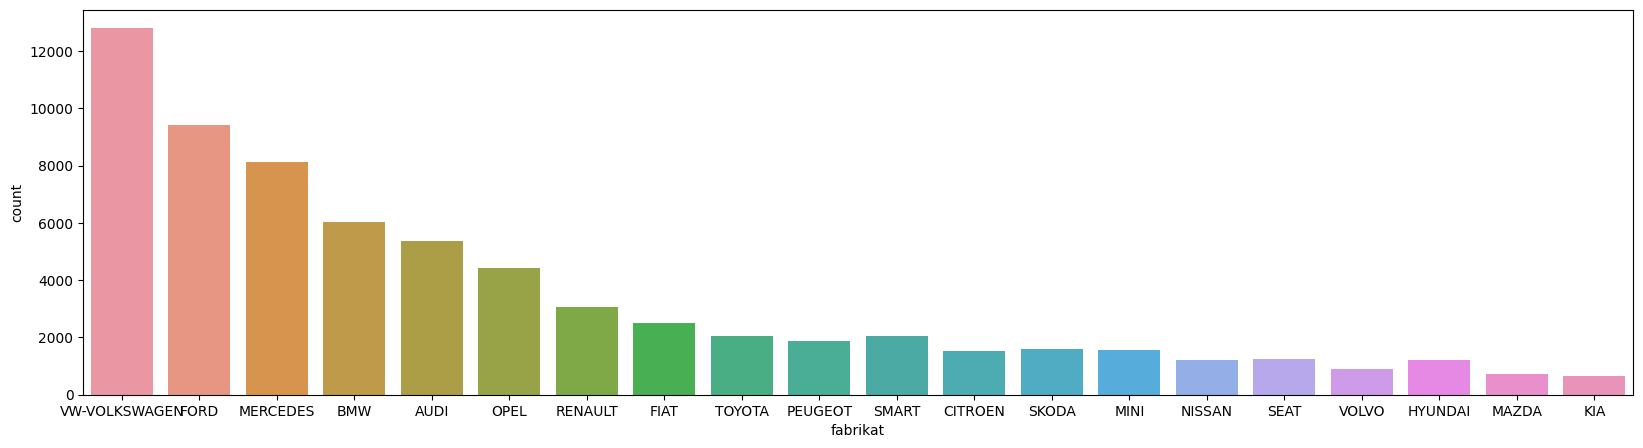

In [24]:
df3 = df18.query("fabrikat == 'VW-VOLKSWAGEN' | fabrikat == 'FORD' |fabrikat == 'MERCEDES' | fabrikat == 'BMW' | fabrikat == 'AUDI' | fabrikat == 'OPEL' | fabrikat == 'RENAULT' | fabrikat == 'FIAT' | fabrikat == 'SMART' | fabrikat == 'TOYOTA' | fabrikat == 'PEUGEOT' | fabrikat == 'CITROEN' | fabrikat == 'SKODA' | fabrikat == 'MINI' | fabrikat == 'SEAT' | fabrikat == 'NISSAN' | fabrikat == 'HYUNDAI' | fabrikat == 'VOLVO' | fabrikat == 'MAZDA' | fabrikat == 'KIA' ")

f,ax = plt.subplots(figsize=(20,5))
sns.countplot(x = 'fabrikat', data = df3, order=df2['fabrikat'].value_counts().index)

**Analysis**

The top 20 most common fines and top 20 most common brands to get fined is based on data of Cologne the year 2016, january. Those attributes are now going to be compared to the data of Cologne in january of the years 2018 to see if there is any changes or develpements to be pointed out.

The most common fines charged changed a little bit over the two years. In general in 2018 were way less fine charged. Some fines were not charged as often as in 2016 or even more compared to the other fines. The fine '141324' was under the top 20 in 2016, but in 2018 it is not now it is '141106.B'.
'141324' is the fine "Sie parkten unzulässig länger als 1 Stunde im eingeschränkten Haltverbot", parking longer than an hour in restricted parking area
'141106.B' is the fine "Sie parkten in einem Fußgängerbereich, der durch Zeichen (239, 242/243) gesperrt war.", parking in an area for pedestrians.

When it comes to brands only Skoda and Nissan changed their position, but in general the top 20 brands to get fined stayed the same. 

TypeError: unhashable type: 'numpy.ndarray'

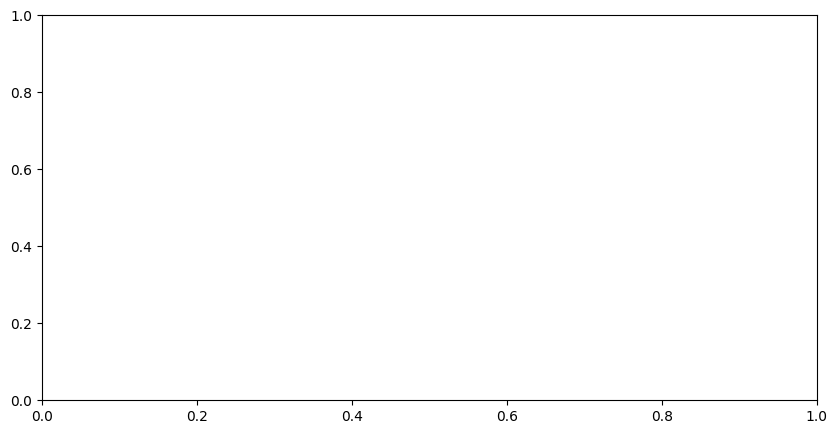

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(df3, label="Year 2016")
plt.plot(df4, label="Year 2012")
plt.xlabel('fabrikat')
plt.ylabel('fabrikat'.value_counts())
plt.title("Car brands comparison")
plt.legend()
plt.show()

***Further Ideas***

In [ ]:
df5 = df18.query("fabrikat in ['VW-VOLKSWAGEN', 'FORD', 'MERCEDES', 'BMW', 'AUDI', 'OPEL', 'RENAULT', 'FIAT', 'SMART', 'TOYOTA', 'PEUGEOT', 'CITROEN', 'SKODA', 'MINI', 'SEAT', 'NISSAN', 'HYUNDAI', 'VOLVO', 'MAZDA', 'KIA'] and \
                tatbestand1 in ['113140', '141312', '141322', '112402', '142103', '112403', '141313', '113141', '113142', '141245', '113144', '141621', '937221', '142278.A', '329113', '113143', '141323', '141314', '910321', '141324']")

result = df5.groupby(['fabrikat', 'tatbestand1']).size().reset_index(name='haufigkeit')
result = result.sort_values('haufigkeit', ascending=False)

print(result)

          fabrikat tatbestand1  haufigkeit
382  VW-VOLKSWAGEN      113140        4888
82            FORD      113140        3537
162       MERCEDES      113140        2910
22             BMW      113140        2299
2             AUDI      113140        2108
..             ...         ...         ...
373          VOLVO      141324           3
194           MINI      141621           3
127            KIA      141245           3
130            KIA      141314           3
154          MAZDA      141621           2

[400 rows x 3 columns]


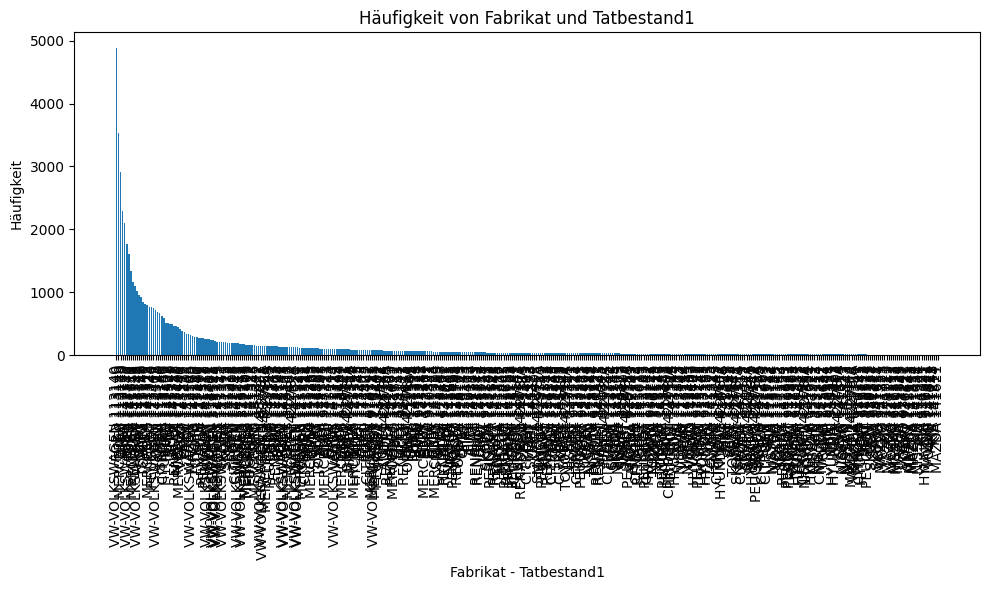

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(result['fabrikat'] + ' ' + result['tatbestand1'], result['haufigkeit'])
plt.xlabel('Fabrikat - Tatbestand1')
plt.ylabel('Häufigkeit')
plt.xticks(rotation=90)
plt.title('Häufigkeit von Fabrikat und Tatbestand1')
plt.tight_layout()
plt.show()

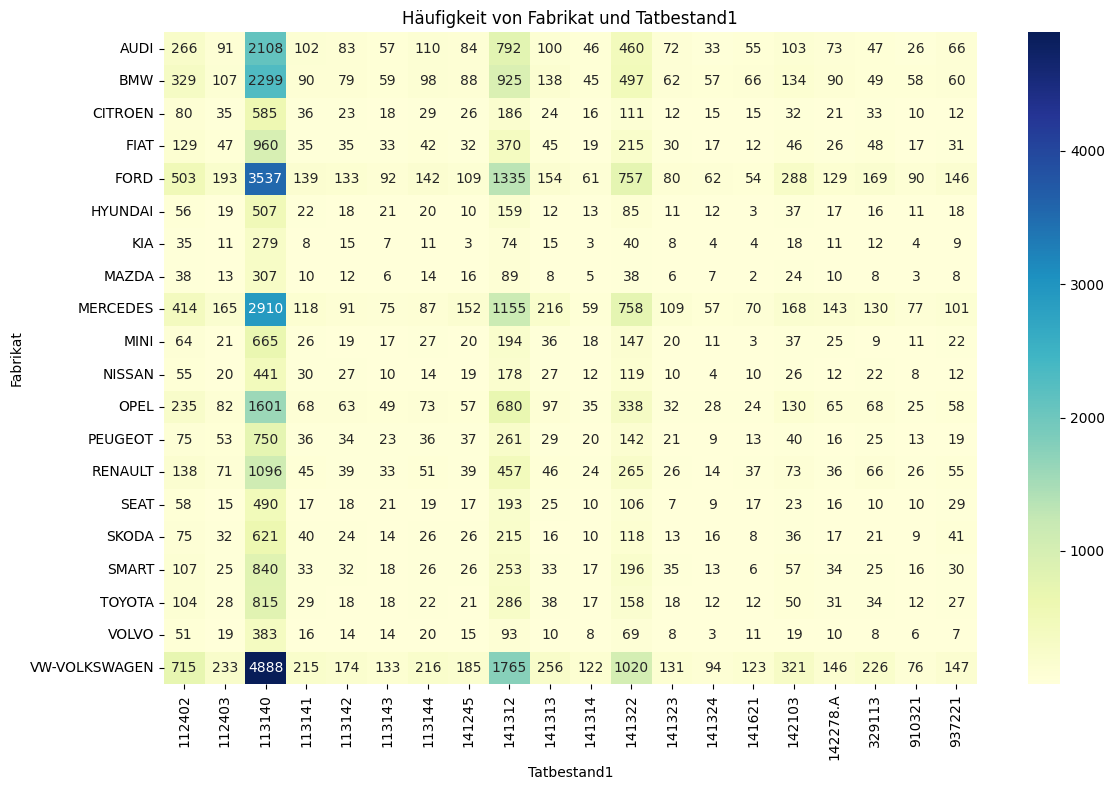

In [ ]:
pivot_table = result.pivot_table(values='haufigkeit', index='fabrikat', columns='tatbestand1', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Tatbestand1')
plt.ylabel('Fabrikat')
plt.title('Häufigkeit von Fabrikat und Tatbestand1')
plt.tight_layout()
plt.show()

In [ ]:
cross_tab = pd.crosstab(df16['fabrikat'], df16['tatbestand1'])

# Calculate the correlation between the columns
correlation = cross_tab.corr()
print(correlation)

tatbestand1         0    101024    101048    101106  112042.A  112042.B   
tatbestand1                                                               
0            1.000000 -0.018601  0.060922 -0.018952  0.511633  0.221996  \
101024      -0.018601  1.000000  0.227689  0.644065  0.487173  0.632543   
101048       0.060922  0.227689  1.000000  0.297769  0.671643  0.714736   
101106      -0.018952  0.644065  0.297769  1.000000  0.462514  0.638034   
112042.A     0.511633  0.487173  0.671643  0.462514  1.000000  0.885761   
...               ...       ...       ...       ...       ...       ...   
970021       0.438956 -0.025071  0.426210 -0.025545  0.412693  0.193343   
970121      -0.011494  0.799824  0.252391  0.814955  0.511633  0.669738   
970221      -0.023395  0.100959  0.367573 -0.038576  0.288678  0.176053   
970321      -0.011494 -0.018601  0.060922 -0.018952  0.203462  0.339823   
970421      -0.027532  0.235501  0.408002  0.382633  0.434631  0.580135   

tatbestand1  112043.A  1

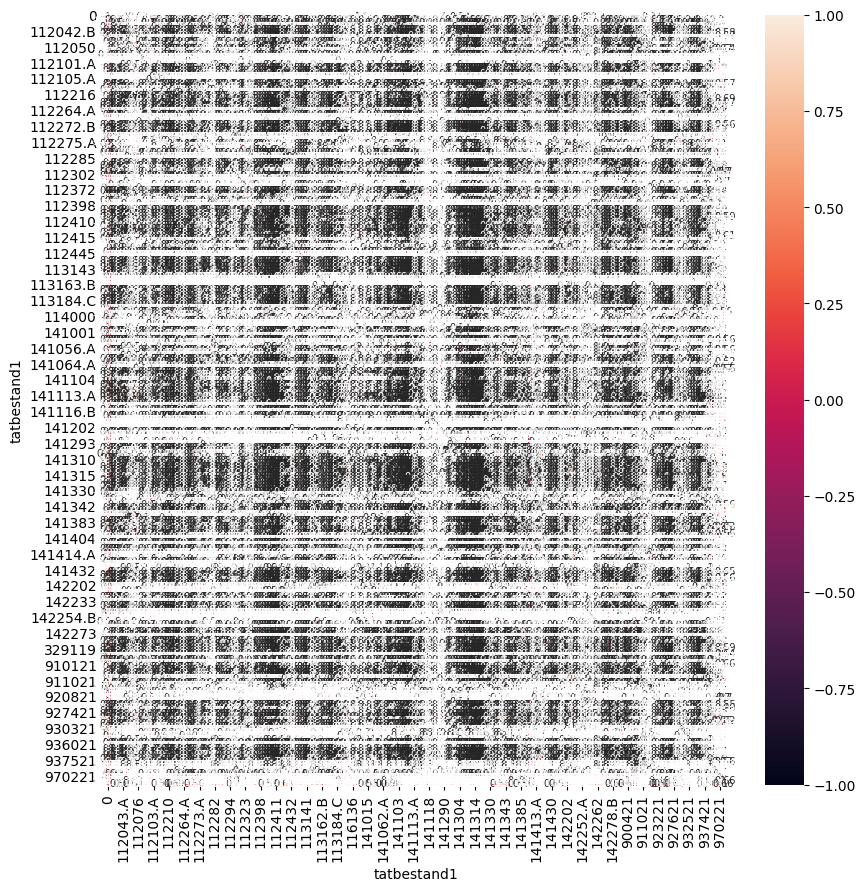

In [ ]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, annot_kws={"size": 7})